# I - Introduction

Analyse des données de la catastrophe du Titanic pour le client "White Star Lines".

La question que nous allons essayer de répondre dans cette analyse est : "Quels facteurs ont joué dans la survie des passagers dans le naufrage du titanic ?".

# II - Charger les librairies nécessaires

Les librairies chargées ci-dessous vont permettres de fournir les outils nécessaires pour analyser les données :
* Pandas pour la manipulation des données ;
* Matplotlib pour la data visualisation ;
* Numpy pour les tableux multidimensionnel ;
* Pylab pour utiliser plus facilement les outils Numpy et Matplotlib.

In [39]:
# Charger les librairies nécessaires
import pandas as pd
import pylab as P
import matplotlib.pyplot as plt
import numpy as np

# III - Charger le fichier de données
Il y a deux sets de données de disponible, l'un pour apprendre et l'autre pour tester les hypothèses que nous allons découvrir durant ce travail de compréhension et d'analyse des données.

Nous allons maintenant charger les données de training.

In [7]:
df = pd.read_csv('train.csv', header=0)

Nous allons maintenant afficher une partie du chargement pour comprendre les données que nous possédons.

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Les données ci-dessus sont une représentation des passagers avec divers informations :
* PassengerId : Identifiant numérique unique à chaque passager ;
* Survived : Si égal à 1 alors le passager à survécue sinon le passager n'a pas survécue ;
* Pclass : Classe d'occupation du titanic (1, 2 ,3) ;
* Name : Prénom et nom ;
* Sex : Sexe ;
* Age : Age ;
* SibSp : Nombre de frères ou de conjoints voyagent avec le passager ;
* Parch : Nombre de parents ou d'enfants voyagent avec le passager ;
* Ticket : Numéro de ticket ;
* Fare : Prix du ticket ;
* Cabin : Numéro de Cabin ;
* Embarked : Port d'embarcation (S, C, Q).

# IV - Nettoyer les Données

Nous allons afficher un descriptif numérique des données pour découvrir s'il ne manque pas des informations que nous aurions besoins par la suite de l'analyse.

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


La variable "count" montre qu'il manque 177 valeurs dans la colonne "Age".

## Combler les données de la colonne "Age"

Dans l'objectif de combler le manque de données de la colonne "Age". Nous allons remplir les données manquantes par une moyenne puis une médiane, puis nous allons choisir la meilleur des deux solutions.

### Moyenne
La moyenne est une des méthodes que nous pouvons appliquer pour combler le manque de données. Le défaut que l'on peut prendre en compte avec cette méthode est qu'elle prend en compte les valeurs extrêmes. Ce qui peut déséquilibrer la valeur puisque qu'elle va tendre vers ces valeurs extrêmes.

In [15]:
dfMean = df.copy()
dfMean['Age'].fillna(dfMean['Age'].mean(), inplace=True)
dfMean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Médiane
La médiane à l'inverse de la moyenne ne va pas prendre en compte les valeurs extrêmes et donc ne va pas tendre vers ces valeurs

In [16]:
dfMedian = df.copy()
dfMedian['Age'].fillna(dfMedian['Age'].median(), inplace=True)
dfMedian.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Conclusion

En prenant en compte les caractéristiques entre la moyenne et la médiane. Nous allons utiliser la médiane pour combler le manque de données.

In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# V - Analyser les données
La partie "Analyse des données" est l'étape qui va nous permettre de comprendre les variables qui ont jouées pour la survie durant le naufrage du titanic.

## V.I - Genre
Notre première hypothèse est que le genre des passagers a joué sur leur survie.

Nous allons maintenant analyser les données pour comprendre si le genre a bien été déterminant dans la survie.

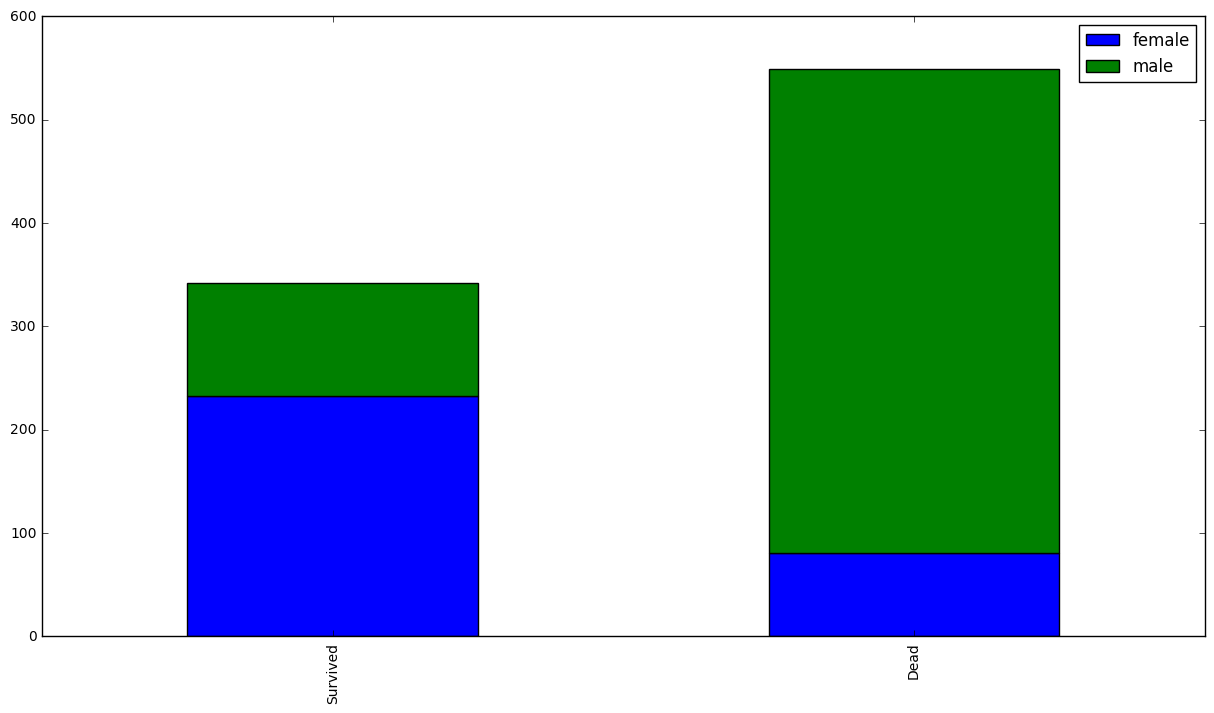

In [95]:
survivedSex = df[df['Survived'] == 1]['Sex'].value_counts()
deadSex = df[df['Survived'] == 0]['Sex'].value_counts()

test = pd.DataFrame([survivedSex,deadSex])
test.title = 'Score'
test.index = ['Survived','Dead']
test.plot(kind='bar',stacked=True, figsize=(15,8))
plt.show()

Nous pouvons observer avec le graphique ci-dessus que les femmes ont aussi bien le plus grand nombre de personnes qui a survécues et que c'est aussi le plus nombre de personnes à être morte.

Nous pouvons donc en conclure que le genre a été un élément déterminant pour la survie durant le naufrage.

## V.II - Age

Notre deuxième hypothèse est que l'age a pu jouer un rôle dans la survie notamment concernant les enfants.

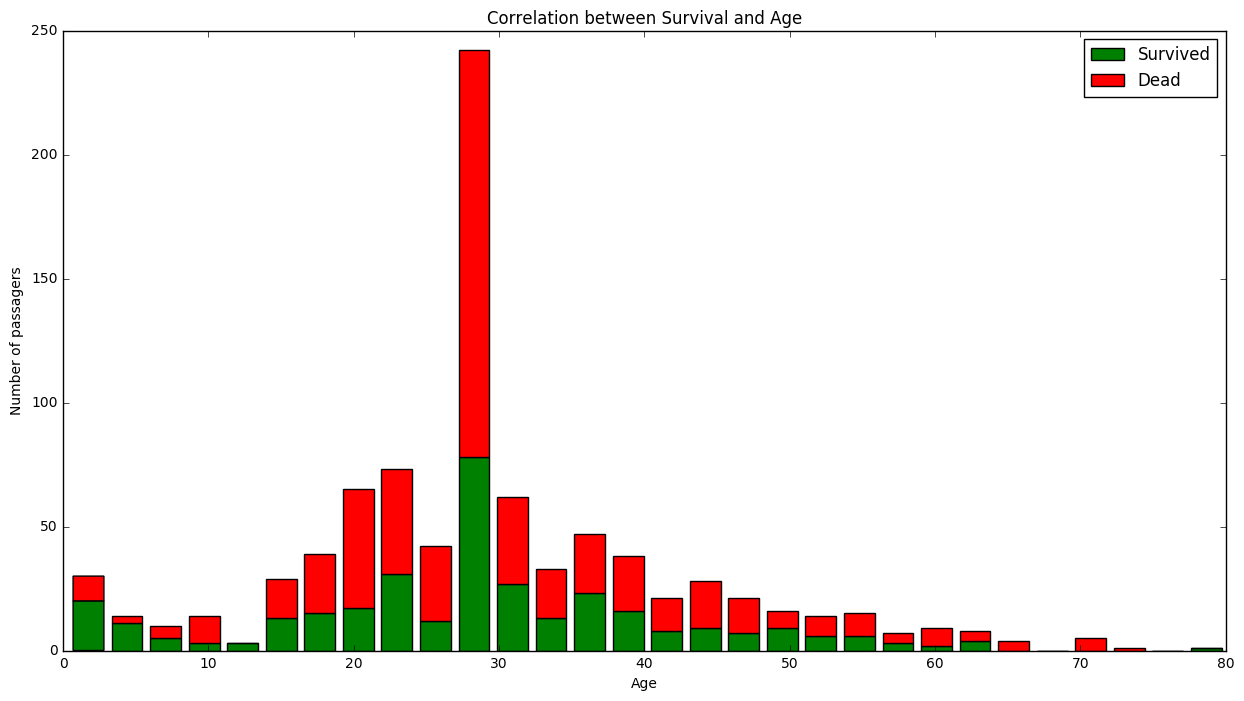

In [84]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']], stacked=True, color = ['g', 'r'], bins = 30, label = ['Survived', 'Dead'])
plt.title('Correlation between Survival and Age')
plt.xlabel('Age')
plt.ylabel('Number of passagers')
plt.legend()
plt.show()

Nous pouvons observer que les enfants de moins de 10 ans ont eu plus de chance de survivre que le reste des personnes dont l'age pouvait être supérieur.

## V.III - Classe d'embarcation
Notre troisième hypothèse est que la classe la plus fortuné à eu plus de chance de s'en sortir vivant que la classe la moins fortuné.

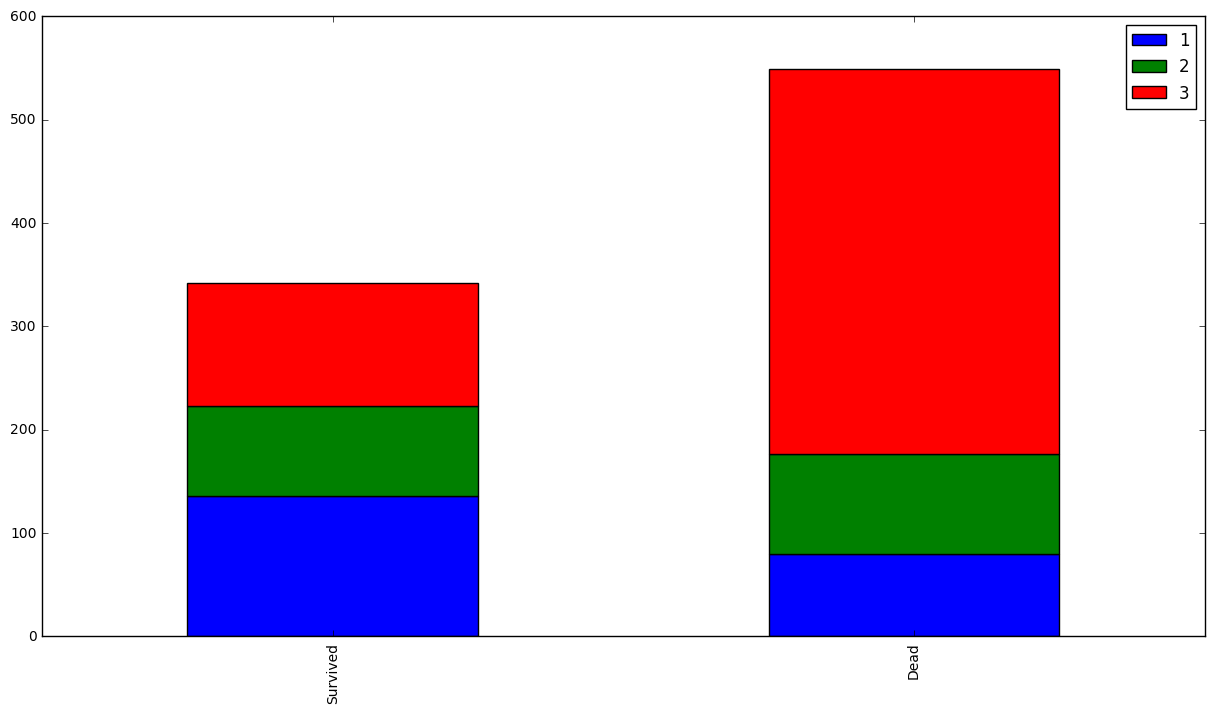

In [97]:
survivedClass = df[df['Survived']==1]['Pclass'].value_counts()
deadClass = df[df['Survived']==0]['Pclass'].value_counts()

test = pd.DataFrame([survivedClass,deadClass])
test.title = 'Score'
test.index = ['Survived','Dead']
test.plot(kind='bar',stacked=True, figsize=(15,8))
plt.show()

Nous pouvons observer qu'il n'y a probablement aucune corrélation entre la classe et la survie. Il y presque autant de gens de chacune d'elle qui ont été sauvées.

Il y a eu plus de mort dans la troisème classe puisqu'elle était la plus représentée sur le bateau.

## V.IV - Prix du ticket

Notre quatrième hypothèse est que le prix du ticket a été un facteur pour la survie.

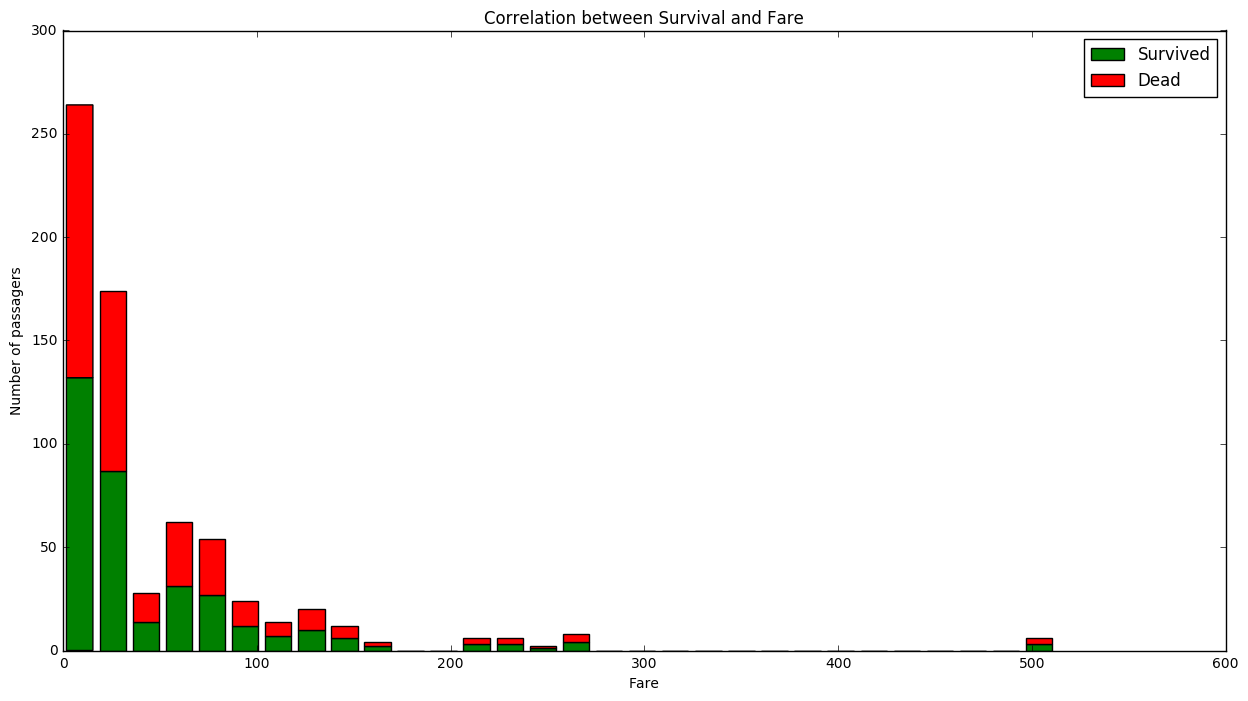

In [109]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Survived'] == 1]['Fare'],df[df['Survived'] == 1]['Fare']], stacked=True, color = ['g', 'r'], bins = 30, label = ['Survived', 'Dead'])
plt.title('Correlation between Survival and Fare')
plt.xlabel('Fare')
plt.ylabel('Number of passagers')
plt.legend()
plt.show()

Nous pouvons observer qu'il n'y a probablement aucune relation entre le prix du ticket et le nombre de passagers qui a survécu. En moyenne, 50% des gens sont morts après avoir payer n'importe quel prix.